# Artificial Intelligence - 2nd Project
## Spruce Tree Type Detection

This project consists in the application of machine learning models and algorithms
related to supervised learning.

The dataset Spruce.csv contains cartographic data for observations made over different 30m × 30m patches in the forests of Alberta, Canada. This dataset has 15,120 observations, with 44 input variables (cartographic variables) and 1 target variable (Tree_Type).

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, matthews_corrcoef, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import time
from collections import Counter
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

## Creating the Dataframe based on Dataset 'Spruce.csv'

In [69]:
data = pd.read_csv("dataset/Spruce.csv")

data.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,...,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Tree_Type
0,2596,3,258,0,510,6279,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
1,2590,2,212,-6,390,6225,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
2,2804,9,268,65,3180,6121,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
3,2785,18,242,118,3090,6211,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other
4,2595,2,153,-1,391,6172,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Other


## 1. Exploratory Data Analysis (EDA)
### Check the class distribution and visualize it

In [70]:
data.describe().round(2)

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,...,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38
count,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,...,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00,15120.00
mean,2749.32,16.50,227.20,51.08,1714.02,1511.15,0.02,0.04,0.06,0.06,...,0.02,0.05,0.04,0.00,0.01,0.00,0.00,0.05,0.04,0.03
std,417.68,8.45,210.08,61.24,1325.07,1099.94,0.15,0.20,0.24,0.23,...,0.15,0.21,0.20,0.04,0.08,0.03,0.05,0.21,0.20,0.17
min,1863.00,0.00,0.00,-146.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2376.00,10.00,67.00,5.00,764.00,730.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2752.00,15.00,180.00,32.00,1316.00,1256.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,3104.00,22.00,330.00,79.00,2270.00,1988.25,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,3849.00,52.00,1343.00,554.00,6890.00,6993.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Tree_Type
Other     12960
Spruce     2160
Name: count, dtype: int64


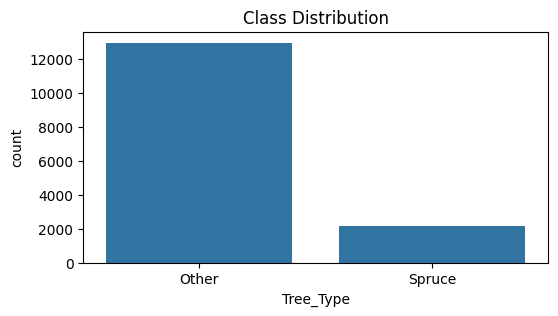

In [71]:
print(data['Tree_Type'].value_counts())

plt.figure(figsize=(6, 3))
sns.countplot(x='Tree_Type', data=data)
plt.title('Class Distribution')
plt.show()

## 2. Data Pre-processing

### Encode target variable 'Tree_Type'
Since 'Tree_Type' is in string format, there is the need to convert it to integer to be able to use it in our models.

In [72]:
label_encoder = LabelEncoder()
data['Tree_Type'] = label_encoder.fit_transform(data['Tree_Type'])

### Replace Soil_Type1 to Soil_Type38 with a single column Soil_Type
Also we will need to aggregate the 'Soil_Type' because the way that it is stored in the dataset is not ideal at all. With that, we will number the 'Soil_Type' from 1 to 38, since there are 38 different types of soil.

In [73]:
soil_type_cols = [f'Soil_Type{i}' for i in range(1, 39)]
data['Soil_Type'] = data[soil_type_cols].idxmax(axis=1).str.extract(r'(\d+)').astype(int)
data.drop(soil_type_cols, axis=1, inplace=True)

### Normalize distances (%)

In [74]:
data['Elevation'] = (data['Elevation'] - data['Elevation'].min()) / (data['Elevation'].max() - data['Elevation'].min())
data['Slope'] = (data['Slope'] - data['Slope'].min()) / (data['Slope'].max() - data['Slope'].min())
data['Horizontal_Distance_To_Hydrology'] = (data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Hydrology'].min()) / (data['Horizontal_Distance_To_Hydrology'].max() - data['Horizontal_Distance_To_Hydrology'].min())
data['Vertical_Distance_To_Hydrology'] = (data['Vertical_Distance_To_Hydrology'] - data['Vertical_Distance_To_Hydrology'].min()) / (data['Vertical_Distance_To_Hydrology'].max() - data['Vertical_Distance_To_Hydrology'].min())
data['Horizontal_Distance_To_Roadways'] = (data['Horizontal_Distance_To_Roadways'] - data['Horizontal_Distance_To_Roadways'].min()) / (data['Horizontal_Distance_To_Roadways'].max() - data['Horizontal_Distance_To_Roadways'].min())
data['Horizontal_Distance_To_Fire_Points'] = (data['Horizontal_Distance_To_Fire_Points'] - data['Horizontal_Distance_To_Fire_Points'].min()) / (data['Horizontal_Distance_To_Fire_Points'].max() - data['Horizontal_Distance_To_Fire_Points'].min())

data.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree_Type,Soil_Type
0,0.369084,0.057692,0.192107,0.208571,0.074020,0.897898,0,27
1,0.366062,0.038462,0.157856,0.200000,0.056604,0.890176,0,27
2,0.473817,0.173077,0.199553,0.301429,0.461538,0.875304,0,11
3,0.464250,0.346154,0.180194,0.377143,0.448476,0.888174,0,28
4,0.368580,0.038462,0.113924,0.207143,0.056749,0.882597,0,27


## 3. Identification of Target Concept
### Analysing the target variable 'Tree_Type' and its correlation with the other features

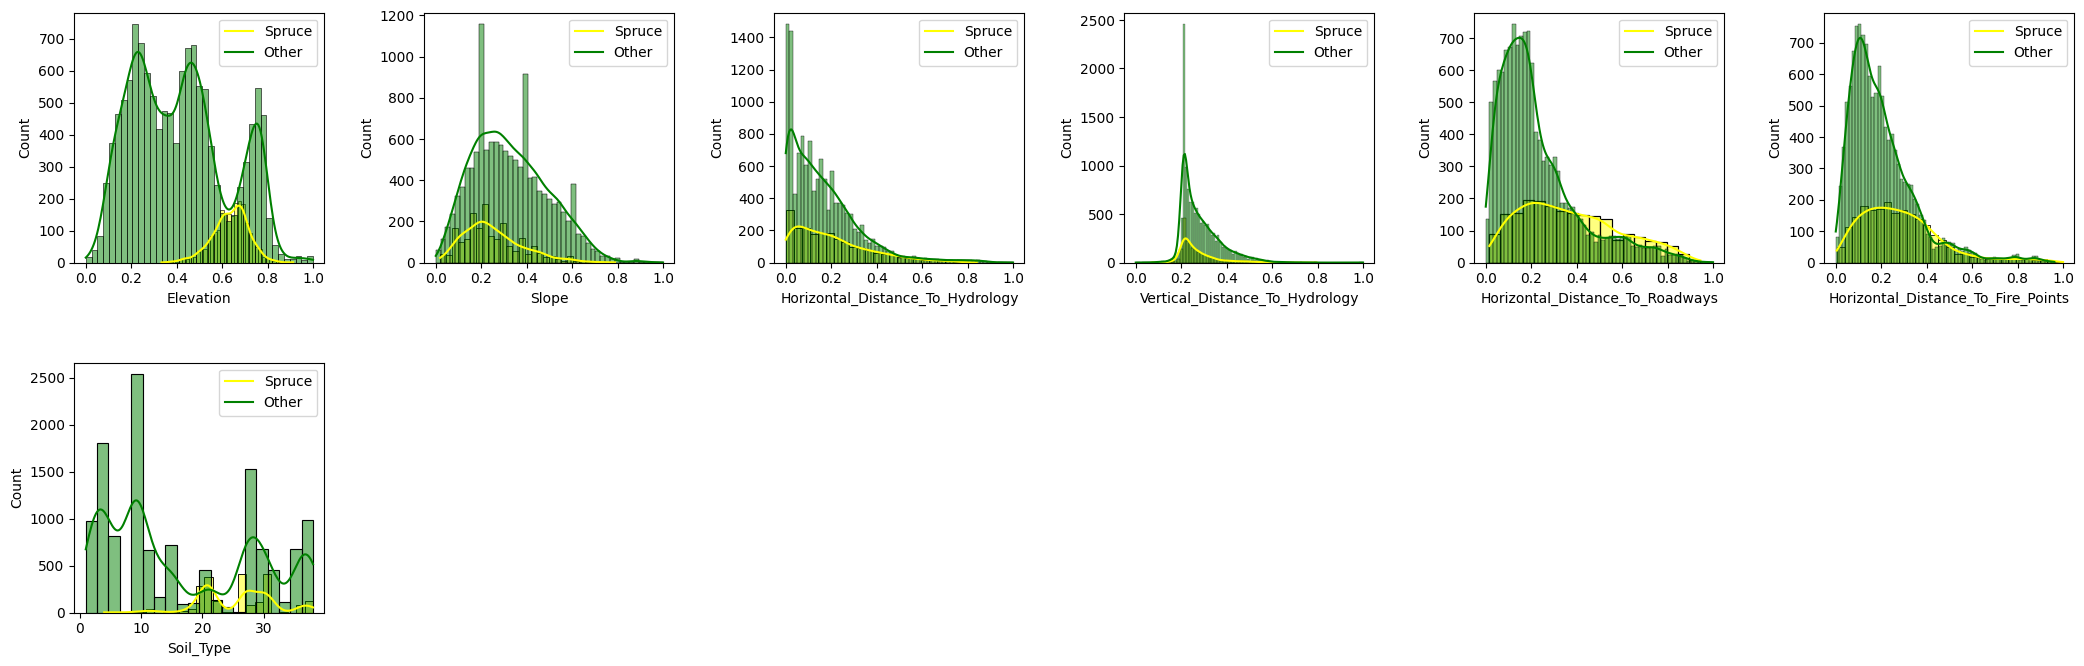

In [75]:
df1 = data[data['Tree_Type'] == 1]
df2 = data[data['Tree_Type'] == 0]

df1 = df1.drop(['Tree_Type'], axis=1)
df2 = df2.drop(['Tree_Type'], axis=1)

cols = list(df1.columns)

plt.figure(figsize=(25, 25))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, col in enumerate(cols):
    plt.subplot(6, 6, i + 1)
    sns.histplot(data=df1[col], color='yellow', label='Spruce', kde=True)
    sns.histplot(data=df2[col], color='green', label='Other', kde=True)
    _, axes = plt.gca().get_legend_handles_labels()
    plt.legend(axes, prop={'size': 10})

plt.show()

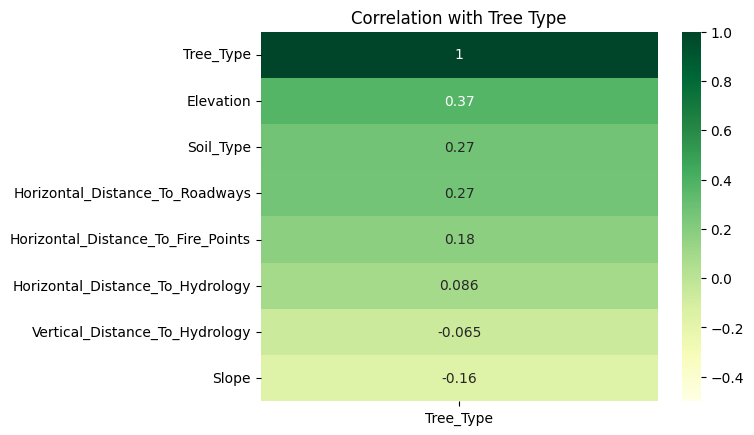

In [76]:
corr = data.corr()['Tree_Type'].sort_values(ascending=False)

# Plot the correlation heatmap
sns.heatmap(corr.to_frame(), annot=True, cmap='YlGn', vmin=-0.5, vmax=1)
plt.title('Correlation with Tree Type')

plt.show()

### Correlation Between Features

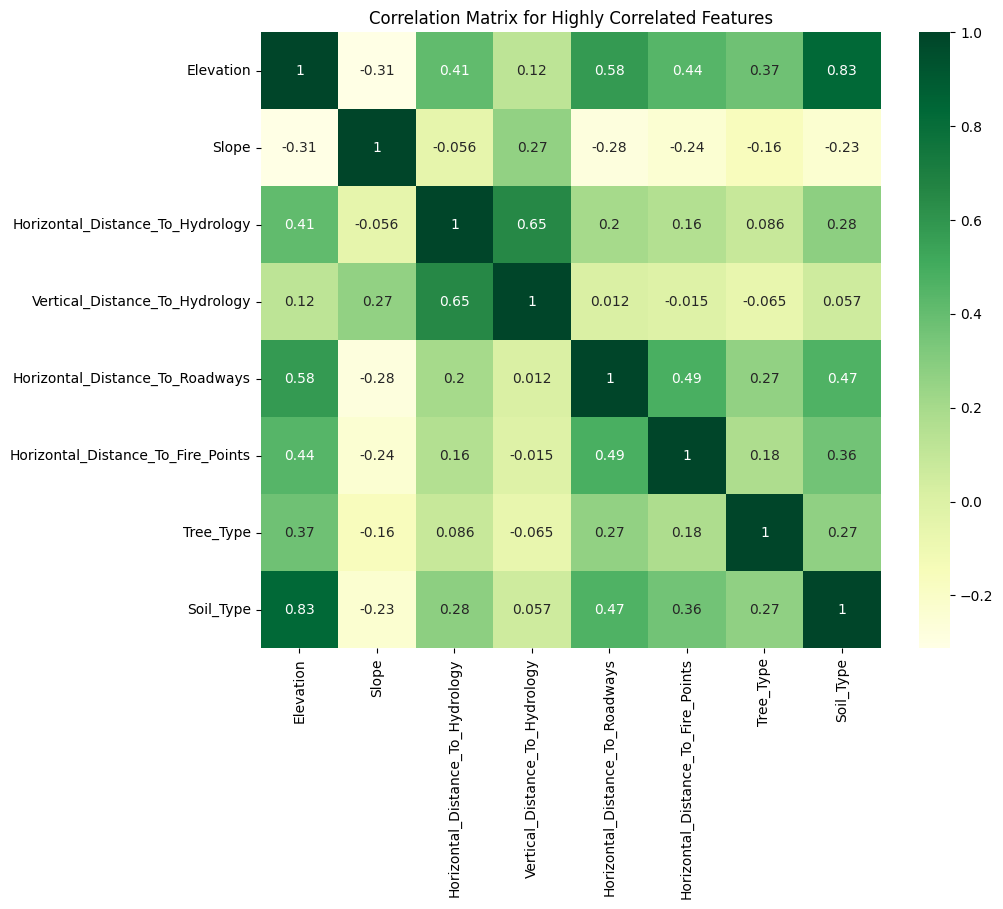

In [77]:
corr_matrix = data.corr()

top_corr_features = corr_matrix.index

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix for Highly Correlated Features')
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGn")

<p>Checking the correlation between the features it's possible to observe that the values are very low, which means that the features are not sufficiently correlated to be able to remove any of them.</p>

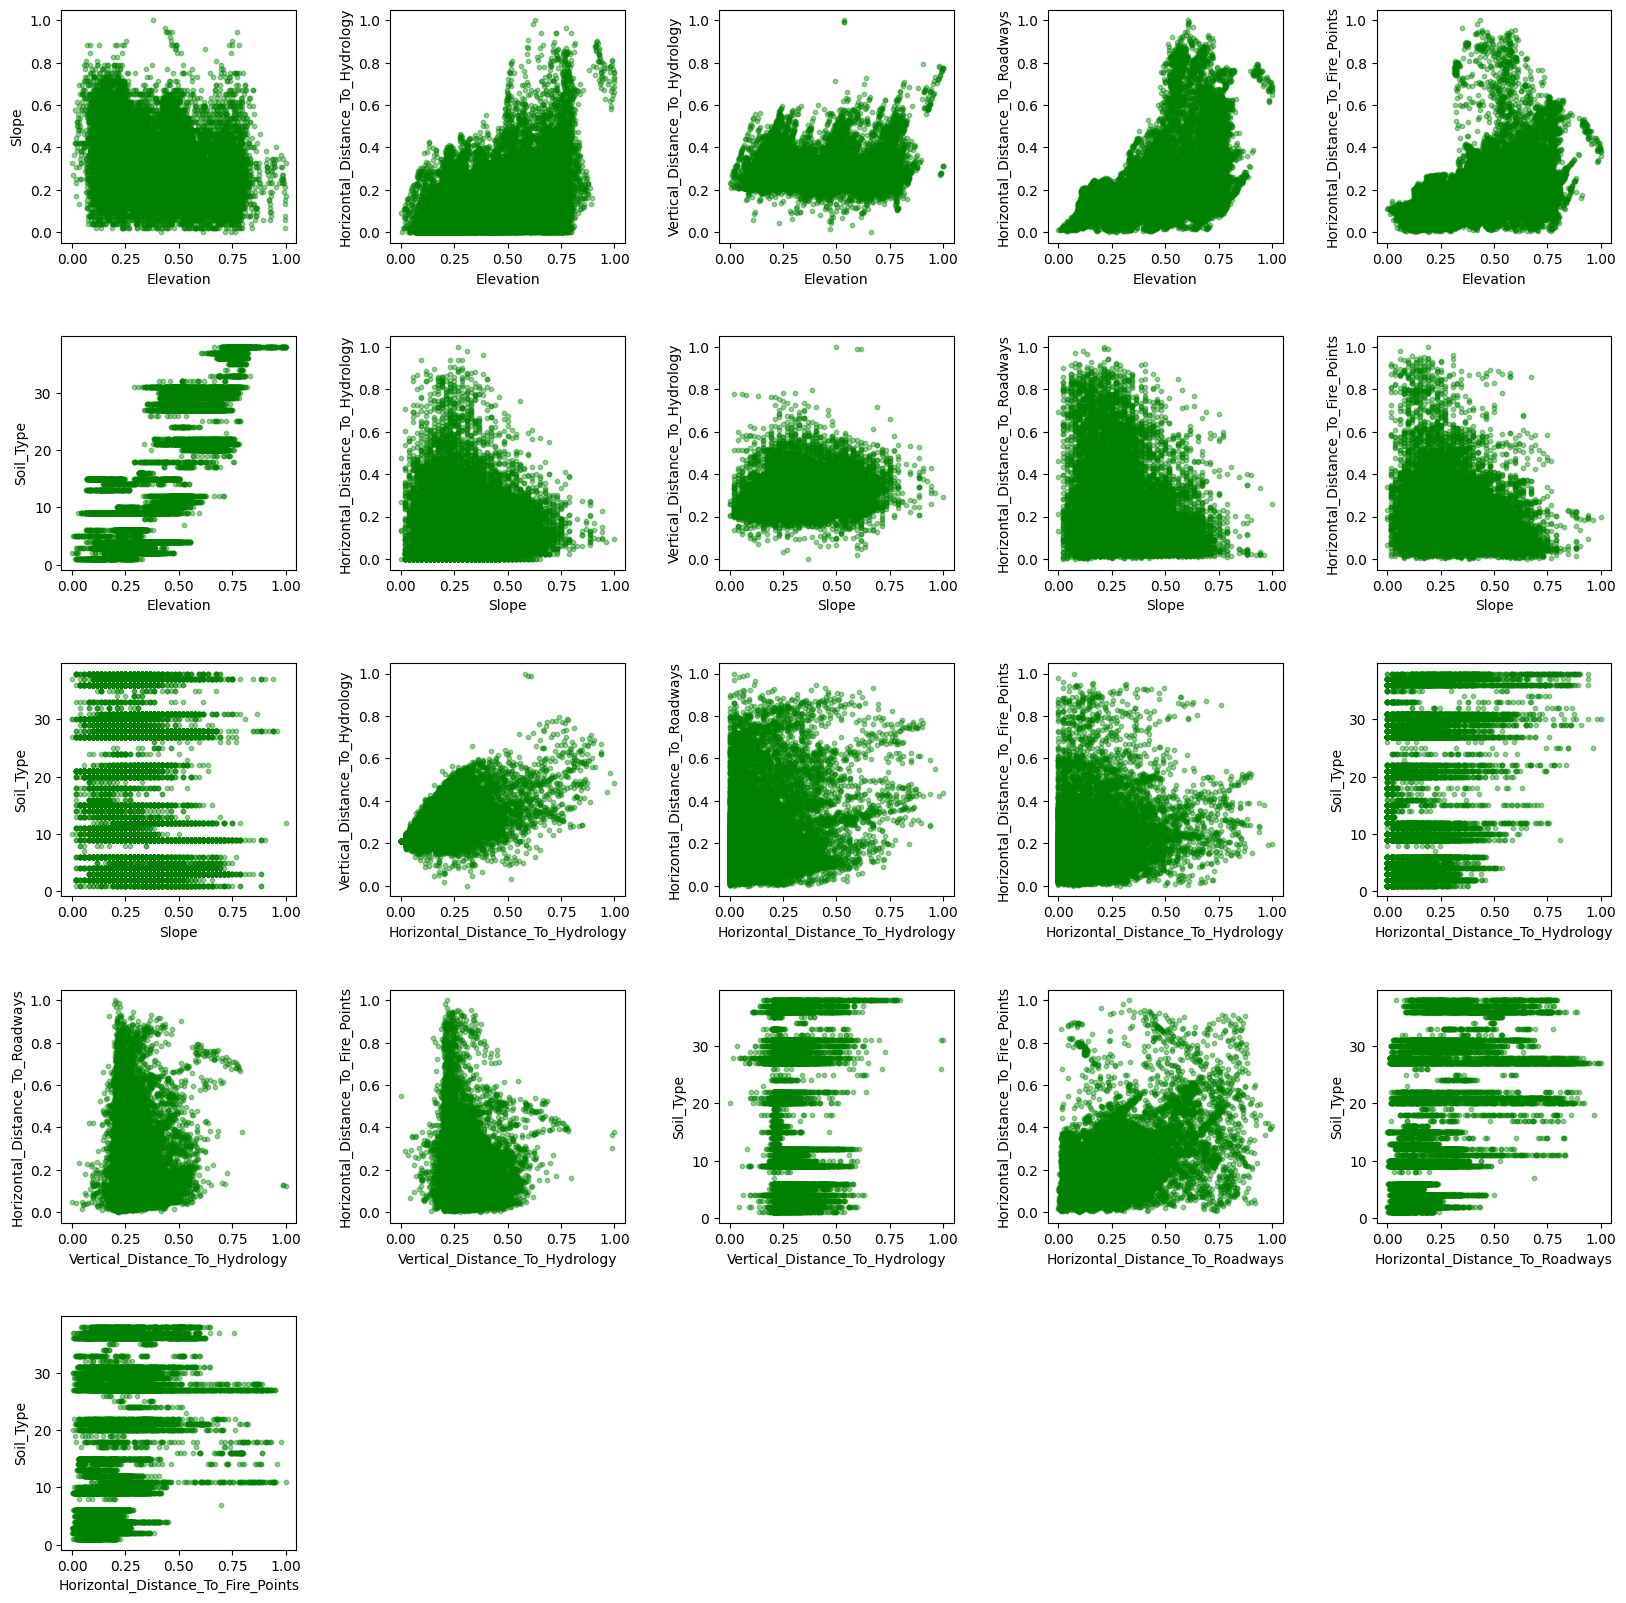

In [78]:
cols = list(data.columns)

# Remove the target variable ('Tree_Type') from the list of columns
cols.remove('Tree_Type')

plot_cols = []

# Calculate pairwise correlations
for i, col1 in enumerate(cols):
    for col2 in cols[i+1:]:
        corr = math.fabs(data[col1].corr(data[col2]))
        corr = round(corr, 2)
        plot_cols.append([col1, col2])

# Check if any pairs were found
if not plot_cols:
    print("No pairs of columns with correlation > 0 were found.")
else:
    # Calculate the number of rows and columns for the grid
    num_plots = len(plot_cols)
    num_rows = int(math.ceil(math.sqrt(num_plots)))
    num_cols = int(math.ceil(num_plots / num_rows))

    # Create a figure and adjust the subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # Flatten the axs array for easier iteration
    axs = axs.flatten()

    for ax, cols in zip(axs, plot_cols):
        ax.scatter(data[cols[0]], data[cols[1]], s=10, c='green', alpha=0.4)
        ax.set_xlabel(cols[0], fontsize=10)
        ax.set_ylabel(cols[1], fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=10)

    # Remove any unused subplots
    for ax in axs[len(plot_cols):]:
        ax.axis('off')

    plt.show()

By analysing the graphs above, we can verify that no feature is highly related to any other, so there is no need to create a new dataframe with reduced features less related to each other.

## 4. Definition of the training and test sets
### Split the data into features (X) and labels (y)

In [79]:
features = data.drop('Tree_Type', axis=1)
labels = data['Tree_Type']

### Split the dataset into training and testing sets

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

### Custom function to oversample the minority class

In [81]:
def oversample(X, y):
    # Count the number of instances for each class
    class_counts = Counter(y)
    
    # Find the majority class count
    majority_count = max(class_counts.values())
    
    # Create empty lists to store the oversampled data
    oversampled_X = []
    oversampled_y = []
    
    # Oversample the minority classes
    for class_label, count in class_counts.items():
        if count < majority_count:
            # Duplicate instances of the minority class
            X_class = X[y == class_label]
            y_class = y[y == class_label]
            num_duplicates = majority_count - count
            oversampled_X.extend(X_class.values.tolist() * num_duplicates)
            oversampled_y.extend(y_class.values.tolist() * num_duplicates)
        
        # Add the majority class instances
        oversampled_X.extend(X[y == class_label].values.tolist())
        oversampled_y.extend(y[y == class_label].values.tolist())
    
    return pd.DataFrame(oversampled_X, columns=X.columns), pd.Series(oversampled_y)

## 5. Selection and Parameterization of Learning Algorithms
### Initialize models


In [82]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression(),
    GaussianNB(),
    MLPClassifier(),
    XGBClassifier(),
    LGBMClassifier(verbose=-1),
    CatBoostClassifier(verbose=0)
]

In [83]:
model_names = ['DTC', 'RFC', 'GBC', 'KNC', 'SVC', 'LR', 'GNB', 'MLP', 'XGB', 'LGBM', 'CatBoost']
accuracies = []
f1_scores = []
confusion_matrices = []
results = []

for model, model_name in zip(models, model_names):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    total_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    kappa = cohen_kappa_score(y_test, y_pred) * 100
    mcc = matthews_corrcoef(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='macro') * 100
    
    results.append([model_name, accuracy, auc, recall, f1, kappa, mcc, total_time, precision])

columns = ['Model', 'Accuracy', 'AUC', 'Recall', 'F1', 'Kappa', 'MCC', 'Prec', 'TT (Sec)']
results_df = pd.DataFrame(results, columns=columns)

# Sort the DataFrame by the 'Accuracy' column in descending order
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)

print(sorted_results_df)

       Model   Accuracy        AUC     Recall         F1      Kappa  \
1        RFC  93.716931  85.399179  85.399179  86.486131  72.977981   
8        XGB  93.055556  85.214119  85.214119  85.425610  70.851460   
10  CatBoost  92.890212  84.918963  84.918963  85.093568  70.187306   
9       LGBM  92.129630  83.083378  83.083378  83.415674  66.832112   
3        KNC  91.964286  81.593548  81.593548  82.662314  65.333535   
2        GBC  90.972222  80.320396  80.320396  80.841105  61.684780   
0        DTC  90.939153  82.192756  82.192756  81.500772  63.005541   
7        MLP  89.021164  68.932795  68.932795  72.424977  45.254374   
4        SVC  86.078042  50.000000  50.000000  46.259108   0.000000   
5         LR  85.052910  50.897877  50.897877  49.051667   2.798879   
6        GNB  80.125661  73.123967  73.123967  67.407803  35.803934   

          MCC       Prec   TT (Sec)  
1   73.044497   1.776984  87.680949  
8   70.853917   0.141327  85.641085  
10  70.188993  11.069283  85.2709

## 6. Results Comparison
### Visualize and compare results

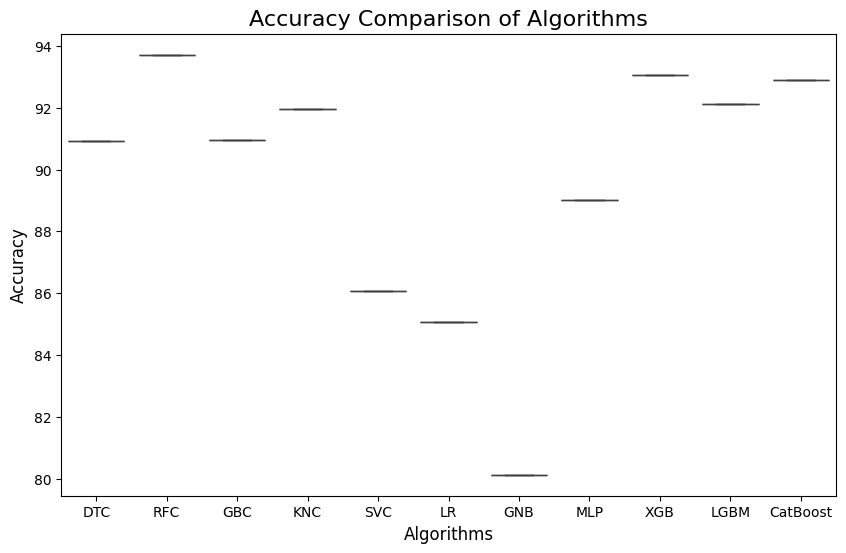

In [84]:
accuracy_data = []
for model_name in model_names:
    accuracy_scores = results_df.loc[results_df['Model'] == model_name, 'Accuracy'].values
    accuracy_data.append(accuracy_scores)

# Create the box plot
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(data=accuracy_data)

# Add x-tick labels with model names
ax.set_xticklabels(model_names)

# Add labels and title
ax.set_xlabel('Algorithms', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Comparison of Algorithms', fontsize=16)

# Show the plot
plt.show()

Analysing the table generated above, it is possible to conclude that Random Forest Classifier is the best model, since it has the highest accuracy of all models used.

In [85]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
best_model.score(X_train, y_train)

1.0

In [87]:
best_model.score(X_test, y_test)

0.9351851851851852

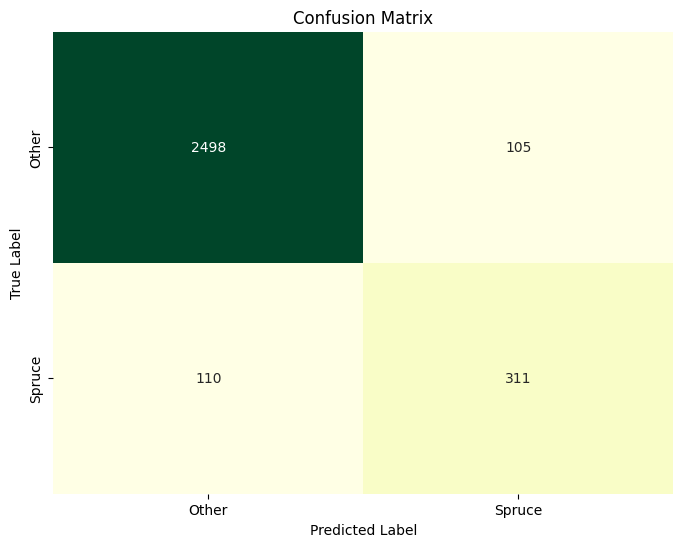

In [88]:
y_predicted = model.predict(X_test)
confusion_matrix_res = confusion_matrix(y_test, y_predicted)

# Create a custom colormap for yellow and green tones
cmap = sns.color_palette("YlGn", as_cmap=True)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_res, annot=True, fmt='d', cmap=cmap, cbar=False,
            xticklabels=["Other", "Spruce"], yticklabels=["Other", "Spruce"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()